# Upload and prepare data

## Import libraries and load data

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [137]:
data = pd.read_csv('kc_house_data_cleaned.csv')

In [138]:
data.shape

(21592, 17)

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        21592 non-null  int64  
 1   price             21592 non-null  float64
 2   bedrooms          21592 non-null  int64  
 3   bathrooms         21592 non-null  float64
 4   sqft_living       21592 non-null  int64  
 5   sqft_lot          21592 non-null  int64  
 6   floors            21592 non-null  float64
 7   waterfront        21592 non-null  int64  
 8   grade             21592 non-null  int64  
 9   sqft_basement     21592 non-null  float64
 10  yr_built          21592 non-null  int64  
 11  yr_renovated      21592 non-null  int64  
 12  zipcode           21592 non-null  int64  
 13  zipcode_pop       21592 non-null  int64  
 14  listings_in_zip   21592 non-null  int64  
 15  hot_market_score  21592 non-null  float64
 16  recent_renov      21592 non-null  int64 

## Set up categories for yr_built

I'll set up six categories:  
1. 1900-1919  
2. 1920-1939  
3. 1940-1959  
4. 1960-1979  
5. 1980-1999  
6. 2000-2015  

In [140]:
# test the filter
data[data.yr_built <= 1919].head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
18,18,825000.0,2,1.0,1150,12775,1.0,1,6,0.0,1908,0,98178,25363,262,10.3,0
37,37,400000.0,6,2.0,2350,6554,2.0,0,8,350.0,1905,0,98178,25363,262,10.3,0
40,40,210000.0,3,1.0,1200,7500,1.0,0,6,0.0,1905,1989,98178,25363,262,10.3,0
48,48,160000.0,2,1.0,1180,9350,1.0,0,6,0.0,1918,0,98178,25363,262,10.3,0
101,101,315000.0,4,2.0,1780,5336,1.5,0,6,0.0,1918,0,98178,25363,262,10.3,0


In [141]:
# get rid of that extra column
data.drop(data.columns[0], axis=1, inplace=True)

In [142]:
# create a new column
data.columns[9]

'yr_built'

In [143]:
data.insert(10, "grouped_yr_built", 0)

In [144]:
# testing it out
for i, j in data[0:5].iterrows(): 
    if j.yr_built == 1955:
        print('yes')
        data.at[i, 'grouped_yr_built'] = 3
    else:
        print('no')
data.head(5)

yes
no
no
no
no


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,0,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,0,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,0,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,0,0,98178,25363,262,10.3,0


In [145]:
# assigning category number to grouped_yr_built
for i, j in data.iterrows(): 
    if j.yr_built <= 1919:
        data.at[i, 'grouped_yr_built'] = 1
    if j.yr_built >= 1920 and j.yr_built <=1939:
        data.at[i, 'grouped_yr_built'] = 2
    if j.yr_built >= 1940 and j.yr_built <=1959:
        data.at[i, 'grouped_yr_built'] = 3
    if j.yr_built >= 1960 and j.yr_built <=1979:
        data.at[i, 'grouped_yr_built'] = 4
    if j.yr_built >= 1980 and j.yr_built <=1999:
        data.at[i, 'grouped_yr_built'] = 5
    if j.yr_built >= 2000 and j.yr_built <=2015:
        data.at[i, 'grouped_yr_built'] = 6

In [146]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,grouped_yr_built,yr_renovated,zipcode,zipcode_pop,listings_in_zip,hot_market_score,recent_renov
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,3,0,98178,25363,262,10.3,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,3,0,98178,25363,262,10.3,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,4,0,98178,25363,262,10.3,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,4,0,98178,25363,262,10.3,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,2,0,98178,25363,262,10.3,0


In [147]:
grouped_yr_built_dummies = pd.get_dummies(data['grouped_yr_built'], prefix='group_yr_built')

In [148]:
data = pd.concat([data, grouped_yr_built_dummies], axis=1)
data.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_basement,yr_built,...,zipcode_pop,listings_in_zip,hot_market_score,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6
0,221900.0,3,1.00,1180,5650,1.0,0,7,0.0,1955,...,25363,262,10.3,0,0,0,1,0,0,0
1,205425.0,2,1.00,880,6780,1.0,0,6,0.0,1945,...,25363,262,10.3,0,0,0,1,0,0,0
2,445000.0,3,2.25,2100,8201,1.0,0,8,480.0,1967,...,25363,262,10.3,0,0,0,0,1,0,0
3,236000.0,3,1.00,1300,5898,1.0,0,7,0.0,1961,...,25363,262,10.3,0,0,0,0,1,0,0
4,170000.0,2,1.00,860,5265,1.0,0,6,0.0,1931,...,25363,262,10.3,0,0,1,0,0,0,0


In [149]:
data.drop(['grouped_yr_built'], axis=1, inplace=True)

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21592 non-null  float64
 1   bedrooms          21592 non-null  int64  
 2   bathrooms         21592 non-null  float64
 3   sqft_living       21592 non-null  int64  
 4   sqft_lot          21592 non-null  int64  
 5   floors            21592 non-null  float64
 6   waterfront        21592 non-null  int64  
 7   grade             21592 non-null  int64  
 8   sqft_basement     21592 non-null  float64
 9   yr_built          21592 non-null  int64  
 10  yr_renovated      21592 non-null  int64  
 11  zipcode           21592 non-null  int64  
 12  zipcode_pop       21592 non-null  int64  
 13  listings_in_zip   21592 non-null  int64  
 14  hot_market_score  21592 non-null  float64
 15  recent_renov      21592 non-null  int64  
 16  group_yr_built_1  21592 non-null  uint8 

## Standardize data

In [151]:
continuous = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade',
              'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'yr_built']
categorical= ['waterfront', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
               'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']
non_transformed= ['bedrooms', 'bathrooms', 'floors',  'price']

In [152]:
data_cont = data[continuous]

In [153]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [154]:
data_cont_norm = data_cont.apply(normalize)

In [155]:
data_cont_norm.head(5)

,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,hot_market_score,yr_built
0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868
1,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323
2,0.023014,-0.170899,0.445346,0.292353,-0.606781,-0.817244,-0.494352,-0.136322
3,-0.855237,-0.228701,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.340595
4,-1.338275,-0.244589,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-1.361960


In [156]:
# calling it "pdata" for "preprocessed data"
pdata = pd.concat([data_cont_norm, data[categorical], data[non_transformed]], axis=1)

In [157]:
pdata.head()

,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,hot_market_score,yr_built,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors,price
0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868,0,0,0,0,1,0,0,0,3,1.00,1.0,221900.0
1,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323,0,0,0,0,1,0,0,0,2,1.00,1.0,205425.0
2,0.023014,-0.170899,0.445346,0.292353,-0.606781,-0.817244,-0.494352,-0.136322,0,0,0,0,0,1,0,0,3,2.25,1.0,445000.0
3,-0.855237,-0.228701,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.340595,0,0,0,0,0,1,0,0,3,1.00,1.0,236000.0
4,-1.338275,-0.244589,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-1.361960,0,0,0,1,0,0,0,0,2,1.00,1.0,170000.0


In [158]:
# move price to the beginning 
price = pdata['price']
pdata.drop(labels=['price'], axis=1,inplace = True)
pdata.insert(0, 'price', price)
pdata.head(2)

,price,sqft_living,sqft_lot,sqft_basement,grade,zipcode_pop,listings_in_zip,hot_market_score,yr_built,waterfront,recent_renov,group_yr_built_1,group_yr_built_2,group_yr_built_3,group_yr_built_4,group_yr_built_5,group_yr_built_6,bedrooms,bathrooms,floors
0,221900.0,-0.986975,-0.234926,-0.651904,-0.560916,-0.606781,-0.817244,-0.494352,-0.544868,0,0,0,0,1,0,0,0,3,1.0,1.0
1,205425.0,-1.316319,-0.206564,-0.651904,-1.414184,-0.606781,-0.817244,-0.494352,-0.885323,0,0,0,0,1,0,0,0,2,1.0,1.0


In [159]:
pdata.shape

(21592, 20)

# Set up train-test split

In [160]:
y = pdata[['price']]
X = pdata.drop(['price'], axis=1)

In [161]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [162]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

17273 4319 17273 4319


In [163]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [164]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [165]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 45832895714.7112
Test Mean Squared Error: 44492837952.92218


# Create and Tune OLS Model

## All data

### Run Model

Import library

In [166]:
from statsmodels.formula.api import ols

In [167]:
pdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21592 entries, 0 to 21591
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21592 non-null  float64
 1   sqft_living       21592 non-null  float64
 2   sqft_lot          21592 non-null  float64
 3   sqft_basement     21592 non-null  float64
 4   grade             21592 non-null  float64
 5   zipcode_pop       21592 non-null  float64
 6   listings_in_zip   21592 non-null  float64
 7   hot_market_score  21592 non-null  float64
 8   yr_built          21592 non-null  float64
 9   waterfront        21592 non-null  int64  
 10  recent_renov      21592 non-null  int64  
 11  group_yr_built_1  21592 non-null  uint8  
 12  group_yr_built_2  21592 non-null  uint8  
 13  group_yr_built_3  21592 non-null  uint8  
 14  group_yr_built_4  21592 non-null  uint8  
 15  group_yr_built_5  21592 non-null  uint8  
 16  group_yr_built_6  21592 non-null  uint8 

In [168]:
pdata.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_basement', 'grade',
       'zipcode_pop', 'listings_in_zip', 'hot_market_score', 'yr_built',
       'waterfront', 'recent_renov', 'group_yr_built_1', 'group_yr_built_2',
       'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5',
       'group_yr_built_6', 'bedrooms', 'bathrooms', 'floors'],
      dtype='object')

In [169]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov', 'yr_built', 'bedrooms', 'bathrooms', 'floors']
# 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6',

In [170]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.648
Method:                 Least Squares   F-statistic:                     3054.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:59:43   Log-Likelihood:            -2.9579e+05
No. Observations:               21592   AIC:                         5.916e+05
Df Residuals:                   21578   BIC:                         5.917e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5.421e+05   9871.213     54.914      0.000    5.23e+05    5.61e+05
sqft_living       1.535e+05   3239.939     47.391      0.000    1.47e+05     1.6e+05
sqft_lot         -1.187e+04   1528.242     -7.765      0.000   -1.49e+04   -8871.416
sqft_basement     8385.0090   1912.588      4.384      0.000    4636.195    1.21e+04
grade             1.542e+05   2530.494     60.918      0.000    1.49e+05    1.59e+05
zipcode_pop      -4.878e+04   5704.535     -8.551      0.000      -6e+04   -3.76e+04
listings_in_zip   3.444e+04   5427.685      6.345      0.000    2.38e+04    4.51e+04
hot_market_score -1.674e+04   4171.991     -4.013      0.000   -2.49e+04   -8565.514
waterfront        7.412e+05   1.82e+04     40.812      0.000    7.06e+05    7.77e+05
recent_renov      4.487e+04   9837.028      4.562      0.000    2.56e+04    6.42e+04
yr_built         -1.122e+05   1943.815    -57.744      0.000   -1.16e+05   -1.08e+05
bedrooms         -4.162e+04   2119.941    -19.630      0.000   -4.58e+04   -3.75e+04
bathrooms         4.673e+04   3482.312     13.420      0.000    3.99e+04    5.36e+04
floors            2.209e+04   3697.104      5.976      0.000    1.48e+04    2.93e+04
==============================================================================
Omnibus:                    15031.811   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           764598.069
Skew:                           2.773   Prob(JB):                         0.00
Kurtosis:                      31.620   Cond. No.                         55.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Good p-values and R-squared. let's see VIFs.

But some of the values don't make sense:
- why would yr_built be negative? You'd think newer houses would cost more.  
- why would adding a bedroom be negative? You'd think a house price would go up with more bedrooms?  
- same with sqft_lot 

In [171]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [172]:
X = pdata.loc[:, chosen_cols]
X
calc_vif(X)

,variables,VIF
0,sqft_living,3.364052
1,sqft_lot,1.070650
2,sqft_basement,1.683638
3,grade,2.979483
4,zipcode_pop,15.117515
5,listings_in_zip,13.675525
6,hot_market_score,8.062420
7,waterfront,1.027635
8,recent_renov,1.082166
9,yr_built,1.583662


Check Q-Q plot

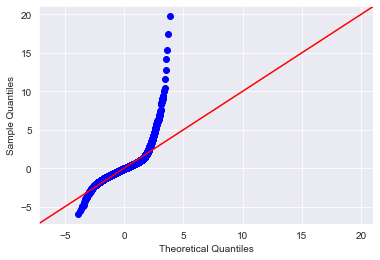

In [173]:
import statsmodels.api as sm
import scipy.stats as stats

fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

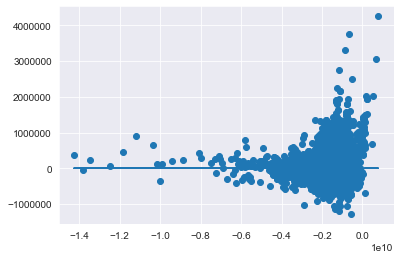

In [174]:
plt.scatter(model.predict(data[x_cols]), model.resid)
plt.plot(model.predict(data[x_cols]), [0 for i in range(len(data))])

Looks really bad. I'm going to remove the higher prices. 

### Limit data to less expensive houses.

In [175]:
pdata.price.describe()

count    2.159200e+04
mean     5.396811e+05
std      3.628833e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.060000e+06
Name: price, dtype: float64

The mean price of the house is \\$540,000. There are probably some very expensive outliers. I'll limit it to \\$800,000 or less.

In [176]:
cheap_homes = pdata[pdata.price <= 800000]

In [177]:
round(cheap_homes.shape[0]/pdata.shape[0], 3)*100

86.4

Still has 86% of the lisitings.

How about to 900k?

In [178]:
cheap_homes = pdata[pdata.price <= 900000]
round(cheap_homes.shape[0]/pdata.shape[0], 3)*100

90.60000000000001

Now 91% of listings.

#### Re-run model and Q-Q plot

##### $800K and less

In [179]:
cheap_homes = pdata[pdata.price <= 800000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     1399.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        10:59:45   Log-Likelihood:            -2.4383e+05
No. Observations:               18652   AIC:                         4.877e+05
Df Residuals:                   18638   BIC:                         4.878e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           3.9e+05   6039.135     64.582      0.000    3.78e+05    4.02e+05
sqft_living       4.879e+04   2111.660     23.104      0.000    4.46e+04    5.29e+04
sqft_lot          2227.1149    980.072      2.272      0.023     306.084    4148.146
sqft_basement     1.387e+04   1226.247     11.311      0.000    1.15e+04    1.63e+04
grade             1.005e+05   1581.753     63.514      0.000    9.74e+04    1.04e+05
zipcode_pop      -2.167e+04   3264.884     -6.638      0.000   -2.81e+04   -1.53e+04
listings_in_zip   2.207e+04   3093.292      7.135      0.000     1.6e+04    2.81e+04
hot_market_score  1.491e+04   2383.385      6.256      0.000    1.02e+04    1.96e+04
waterfront        1.261e+05   1.95e+04      6.453      0.000    8.78e+04    1.64e+05
recent_renov     -6383.4451   6719.857     -0.950      0.342   -1.96e+04    6788.088
yr_built         -6.798e+04   1202.681    -56.520      0.000   -7.03e+04   -6.56e+04
bedrooms         -9694.0131   1273.500     -7.612      0.000   -1.22e+04   -7197.838
bathrooms          2.73e+04   2112.806     12.922      0.000    2.32e+04    3.14e+04
floors            3.825e+04   2182.372     17.528      0.000     3.4e+04    4.25e+04
==============================================================================
Omnibus:                      474.094   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              512.342
Skew:                           0.392   Prob(JB):                    5.58e-112
Kurtosis:                       3.211   Cond. No.                         100.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

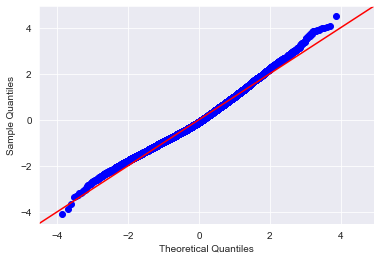

In [180]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

##### 900K and less

In [183]:
cheap_homes = pdata[pdata.price <= 900000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1739.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:01:08   Log-Likelihood:            -2.5703e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19548   BIC:                         5.142e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.062e+05   6215.013     65.361      0.000    3.94e+05    4.18e+05
sqft_living       5.928e+04   2155.191     27.508      0.000    5.51e+04    6.35e+04
sqft_lot          1235.1264    989.353      1.248      0.212    -704.090    3174.343
sqft_basement     1.202e+04   1254.230      9.584      0.000    9562.682    1.45e+04
grade             1.099e+05   1617.473     67.948      0.000    1.07e+05    1.13e+05
zipcode_pop      -2.899e+04   3417.509     -8.483      0.000   -3.57e+04   -2.23e+04
listings_in_zip   2.823e+04   3248.677      8.690      0.000    2.19e+04    3.46e+04
hot_market_score  9204.6010   2500.544      3.681      0.000    4303.321    1.41e+04
waterfront        1.413e+05   1.95e+04      7.227      0.000    1.03e+05     1.8e+05
recent_renov      7707.3233   6618.886      1.164      0.244   -5266.258    2.07e+04
yr_built         -7.427e+04   1232.837    -60.241      0.000   -7.67e+04   -7.19e+04
bedrooms         -9783.2472   1319.159     -7.416      0.000   -1.24e+04   -7197.584
bathrooms         2.609e+04   2183.554     11.947      0.000    2.18e+04    3.04e+04
floors            3.791e+04   2271.307     16.693      0.000    3.35e+04    4.24e+04
==============================================================================
Omnibus:                      692.610   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.465
Skew:                           0.436   Prob(JB):                    1.25e-175
Kurtosis:                       3.476   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

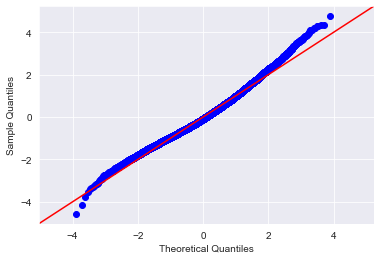

In [182]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

They look the same so I'll stick with 900k

Try for $150K

In [184]:
cheap_homes = pdata[pdata.price <= 1500000]
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=cheap_homes).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     2619.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:01:19   Log-Likelihood:            -2.8163e+05
No. Observations:               21079   AIC:                         5.633e+05
Df Residuals:                   21065   BIC:                         5.634e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.458e+05   7242.881     61.555      0.000    4.32e+05     4.6e+05
sqft_living       8.523e+04   2449.633     34.792      0.000    8.04e+04       9e+04
sqft_lot         -3755.2917   1144.584     -3.281      0.001   -5998.764   -1511.819
sqft_basement     1.423e+04   1425.590      9.982      0.000    1.14e+04     1.7e+04
grade             1.395e+05   1856.390     75.122      0.000    1.36e+05    1.43e+05
zipcode_pop      -4.374e+04   4111.324    -10.639      0.000   -5.18e+04   -3.57e+04
listings_in_zip    3.76e+04   3918.004      9.597      0.000    2.99e+04    4.53e+04
hot_market_score -6934.0989   3012.118     -2.302      0.021   -1.28e+04   -1030.117
waterfront        2.735e+05   1.81e+04     15.116      0.000    2.38e+05    3.09e+05
recent_renov      3.017e+04   7353.349      4.102      0.000    1.58e+04    4.46e+04
yr_built         -9.295e+04   1428.814    -65.052      0.000   -9.57e+04   -9.01e+04
bedrooms         -1.751e+04   1553.862    -11.272      0.000   -2.06e+04   -1.45e+04
bathrooms         3.191e+04   2557.430     12.479      0.000    2.69e+04    3.69e+04
floors            3.987e+04   2691.880     14.812      0.000    3.46e+04    4.51e+04
==============================================================================
Omnibus:                     3186.764   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8140.209
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.530   Cond. No.                         76.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

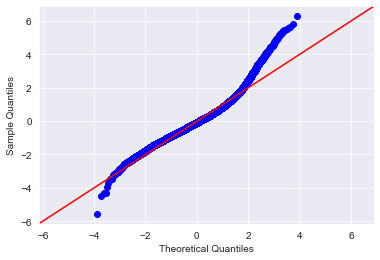

In [185]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Yes, the outliers return. I'll stick with $900k

## Limit to cheaper homes

In [187]:
pdata = pdata[pdata.price <= 900000]

In [188]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov', 'yr_built', 'bedrooms', 'bathrooms', 'floors']
# 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6',

In [189]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1739.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:03:00   Log-Likelihood:            -2.5703e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19548   BIC:                         5.142e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.062e+05   6215.013     65.361      0.000    3.94e+05    4.18e+05
sqft_living       5.928e+04   2155.191     27.508      0.000    5.51e+04    6.35e+04
sqft_lot          1235.1264    989.353      1.248      0.212    -704.090    3174.343
sqft_basement     1.202e+04   1254.230      9.584      0.000    9562.682    1.45e+04
grade             1.099e+05   1617.473     67.948      0.000    1.07e+05    1.13e+05
zipcode_pop      -2.899e+04   3417.509     -8.483      0.000   -3.57e+04   -2.23e+04
listings_in_zip   2.823e+04   3248.677      8.690      0.000    2.19e+04    3.46e+04
hot_market_score  9204.6010   2500.544      3.681      0.000    4303.321    1.41e+04
waterfront        1.413e+05   1.95e+04      7.227      0.000    1.03e+05     1.8e+05
recent_renov      7707.3233   6618.886      1.164      0.244   -5266.258    2.07e+04
yr_built         -7.427e+04   1232.837    -60.241      0.000   -7.67e+04   -7.19e+04
bedrooms         -9783.2472   1319.159     -7.416      0.000   -1.24e+04   -7197.584
bathrooms         2.609e+04   2183.554     11.947      0.000    2.18e+04    3.04e+04
floors            3.791e+04   2271.307     16.693      0.000    3.35e+04    4.24e+04
==============================================================================
Omnibus:                      692.610   Durbin-Watson:                   1.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.465
Skew:                           0.436   Prob(JB):                    1.25e-175
Kurtosis:                       3.476   Cond. No.                         97.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### change to categorical for year

I don't like how the year is negative. I also standardized it. I'll switch to the yr_group categories

In [191]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov',  'bedrooms', 'bathrooms', 'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5', 'group_yr_built_6']

In [192]:
outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1332.
Date:                Wed, 21 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:05:57   Log-Likelihood:            -2.5701e+05
No. Observations:               19562   AIC:                         5.141e+05
Df Residuals:                   19544   BIC:                         5.142e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.885e+05   5445.155     71.342      0.000    3.78e+05    3.99e+05
sqft_living        5.93e+04   2155.351     27.512      0.000    5.51e+04    6.35e+04
sqft_lot          2949.6956    995.506      2.963      0.003     998.419    4900.973
sqft_basement      1.18e+04   1263.480      9.341      0.000    9325.093    1.43e+04
grade             1.096e+05   1617.320     67.749      0.000    1.06e+05    1.13e+05
zipcode_pop      -2.699e+04   3429.276     -7.869      0.000   -3.37e+04   -2.03e+04
listings_in_zip   2.725e+04   3255.351      8.371      0.000    2.09e+04    3.36e+04
hot_market_score  8381.3954   2508.773      3.341      0.001    3463.985    1.33e+04
waterfront        1.414e+05   1.95e+04      7.240      0.000    1.03e+05     1.8e+05
recent_renov      1.292e+04   6614.229      1.953      0.051     -48.953    2.59e+04
bedrooms         -7422.3981   1342.632     -5.528      0.000   -1.01e+04   -4790.724
bathrooms         2.453e+04   2215.368     11.073      0.000    2.02e+04    2.89e+04
floors            2.345e+04   2556.037      9.175      0.000    1.84e+04    2.85e+04
group_yr_built_1  1.767e+05   3198.206     55.237      0.000     1.7e+05    1.83e+05
group_yr_built_2  1.576e+05   2950.259     53.430      0.000    1.52e+05    1.63e+05
group_yr_built_3  9.032e+04   2077.256     43.478      0.000    8.62e+04    9.44e+04
group_yr_built_4  1.939e+04   2077.585      9.332      0.000    1.53e+04    2.35e+04
group_yr_built_5  -2.57e+04   2464.217    -10.429      0.000   -3.05e+04   -2.09e+04
group_yr_built_6 -2.983e+04   2995.285     -9.958      0.000   -3.57e+04    -2.4e+04
==============================================================================
Omnibus:                      626.693   Durbin-Watson:                   1.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              711.986
Skew:                           0.420   Prob(JB):                    2.48e-155
Kurtosis:                       3.411   Cond. No.                     3.84e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.56e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Yes, it makes more sense, but some of the other ones are still off.
Check the VIFs.

In [195]:
X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,3.831203
1,sqft_lot,1.092007
2,sqft_basement,1.686564
3,grade,2.345396
4,zipcode_pop,15.295594
5,listings_in_zip,13.723782
6,hot_market_score,8.244877
7,waterfront,1.007206
8,recent_renov,1.044095
9,bedrooms,1.799771


In [ ]:
# eliminate group_yr_built_6

In [197]:
chosen_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bedrooms,22.357344
1,bathrooms,22.299990
2,sqft_living,3.027584
3,sqft_lot,1.086853
4,sqft_basement,1.695605
5,grade,2.439319
6,zipcode_pop,15.217926
7,listings_in_zip,13.632327
8,hot_market_score,8.124446
9,waterfront,1.008914


Yes, that helped the group_yr VIFs

Eliminate bedrooms

In [198]:
chosen_cols = ['bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,bathrooms,16.485888
1,sqft_living,2.804172
2,sqft_lot,1.082965
3,sqft_basement,1.694385
4,grade,2.368939
5,zipcode_pop,15.213106
6,listings_in_zip,13.630225
7,hot_market_score,8.124438
8,waterfront,1.007881
9,recent_renov,1.049090


Eliminate bathrooms.

In [199]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'zipcode_pop', 'listings_in_zip', 'hot_market_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,2.618848
1,sqft_lot,1.082645
2,sqft_basement,1.555364
3,grade,2.368905
4,zipcode_pop,15.211182
5,listings_in_zip,13.626410
6,hot_market_score,8.118995
7,waterfront,1.007645
8,recent_renov,1.046742
9,floors,2.965233


`zipcode_pop`, `listings_in_zip`, and `hot_market_score` are all based on each other. I'll get rid of `zipcode_pop`, `listings_in_zip`.

In [200]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'hot_market_score',
               'waterfront', 'recent_renov',  'floors', 'group_yr_built_1', 
               'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 'group_yr_built_5']

X = pdata.loc[:, chosen_cols]
calc_vif(X)

,variables,VIF
0,sqft_living,2.602185
1,sqft_lot,1.062762
2,sqft_basement,1.547500
3,grade,2.361729
4,hot_market_score,1.055104
5,waterfront,1.004843
6,recent_renov,1.046655
7,floors,2.963659
8,group_yr_built_1,1.314674
9,group_yr_built_2,1.354531


**Looks good!** I'll redo the model and Q-Q plot.

In [1]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'hot_market_score', 'waterfront', 'recent_renov',  
               'floors', 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4', 
               'group_yr_built_5']

outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

NameError: name 'ols' is not defined

Only the group_yr_built_5 has a high p-score. But all the variables make sense!

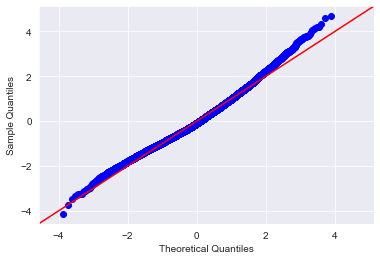

In [203]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

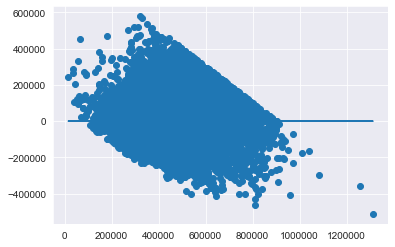

In [206]:
plt.scatter(model.predict(pdata[x_cols]), model.resid)
plt.plot(model.predict(pdata[x_cols]), [0 for i in range(len(pdata))])

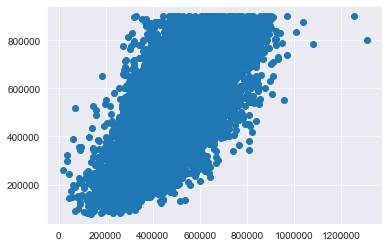

In [209]:
plt.scatter(model.predict(pdata[x_cols]), pdata.price)
# plot a diaganol line 0, 900000  and 0 900000

Not sure how to interpret this.

In [208]:
pdata.price.describe()

count     19562.000000
mean     453730.230651
std      180655.707780
min       78000.000000
25%      310000.000000
50%      425000.000000
75%      575000.000000
max      900000.000000
Name: price, dtype: float64

Removing the one with the high p-value.                'group_yr_built_5'

In [211]:
chosen_cols = ['sqft_living', 'sqft_lot', 'sqft_basement', 'grade', 'hot_market_score', 'waterfront', 'recent_renov',  
               'floors', 'group_yr_built_1', 'group_yr_built_2', 'group_yr_built_3', 'group_yr_built_4']

outcome = 'price'
x_cols = chosen_cols
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=pdata).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     1851.
Date:                Thu, 22 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:53:05   Log-Likelihood:            -2.5712e+05
No. Observations:               19562   AIC:                         5.143e+05
Df Residuals:                   19549   BIC:                         5.144e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.836e+05   4484.021     85.549      0.000    3.75e+05    3.92e+05
sqft_living       6.138e+04   1766.538     34.748      0.000    5.79e+04    6.48e+04
sqft_lot          2565.5214    982.278      2.612      0.009     640.173    4490.869
sqft_basement     1.561e+04   1236.589     12.620      0.000    1.32e+04     1.8e+04
grade             1.122e+05   1600.957     70.107      0.000    1.09e+05    1.15e+05
hot_market_score   2.75e+04    901.495     30.505      0.000    2.57e+04    2.93e+04
waterfront        1.432e+05   1.96e+04      7.308      0.000    1.05e+05    1.82e+05
recent_renov      2.118e+04   6602.517      3.208      0.001    8236.963    3.41e+04
floors            2.952e+04   2388.723     12.358      0.000    2.48e+04    3.42e+04
group_yr_built_1   1.93e+05   4069.411     47.419      0.000    1.85e+05    2.01e+05
group_yr_built_2  1.743e+05   3844.906     45.337      0.000    1.67e+05    1.82e+05
group_yr_built_3   1.07e+05   3092.672     34.595      0.000    1.01e+05    1.13e+05
group_yr_built_4  3.842e+04   2850.617     13.476      0.000    3.28e+04     4.4e+04
==============================================================================
Omnibus:                      612.052   Durbin-Watson:                   1.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.357
Skew:                           0.417   Prob(JB):                    1.23e-150
Kurtosis:                       3.388   Cond. No.                         41.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

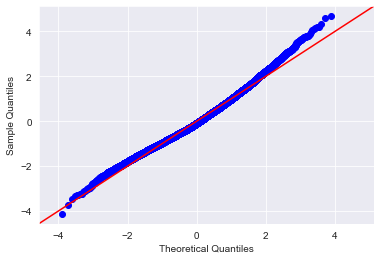

In [212]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

Text(0, 0.5, 'Prices')

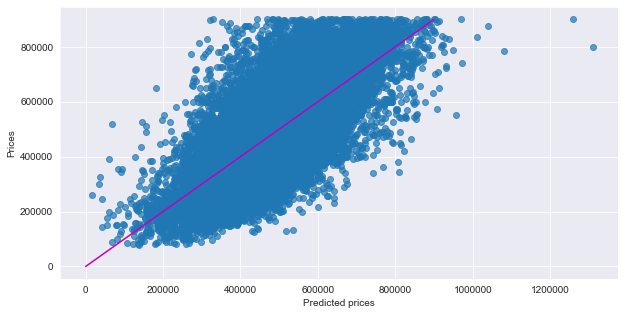

In [227]:
plt.figure(figsize=(10,5))
plt.scatter(model.predict(pdata[x_cols]), pdata.price, alpha=0.7)
plt.plot([0, 900000], [0, 900000], color="m")
plt.xlabel("Predicted prices")
plt.ylabel("Prices")